##-PALASH GUPTA (BATCH 4 & 5)

Linear Regression

Program 1

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#create the data
x = [[1],[2],[3],[4],[5]]
y = [1,2,3,4,5]

In [ ]:
#create the Linear Regression model
model = LinearRegression()

In [ ]:
#fit the model to the data (Training the model)
model.fit(x,y)

LinearRegression()

In [ ]:
#predict a new value
predicted_value = model.predict([[10]])
print(predicted_value)

[10.]


Program 2

In [ ]:
import pandas as pd

In [ ]:
iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
y = iris[['SepalLengthCm']]
x = iris[['PetalLengthCm']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3) #training set = 70% and testing set = 30%

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_test.head(),y_pred[0:5]

(    SepalLengthCm
 13            4.3
 30            4.8
 71            6.1
 78            6.0
 88            5.6,
 array([[4.76072545],
        [4.96671633],
        [5.95547251],
        [6.16146339],
        [5.99667069]]))

House Price Prediction using Linear Regression

In [ ]:
#Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load and Explore Data
df=pd.read_csv("/content/Housing.csv")

In [ ]:
#Display Rows of Dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df. shape

(545, 13)

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [ ]:
df["price"].unique().sum()

np.int64(1150235940)

In [ ]:
#Check for infinite values and replace them with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
#Drop rows with NaN values
df.dropna(subset=['price'], inplace=True)

In [ ]:
#Set the aesthetic style of the plots
sns.set_style("whitegrid")

Scatter Plot of Price vs Area

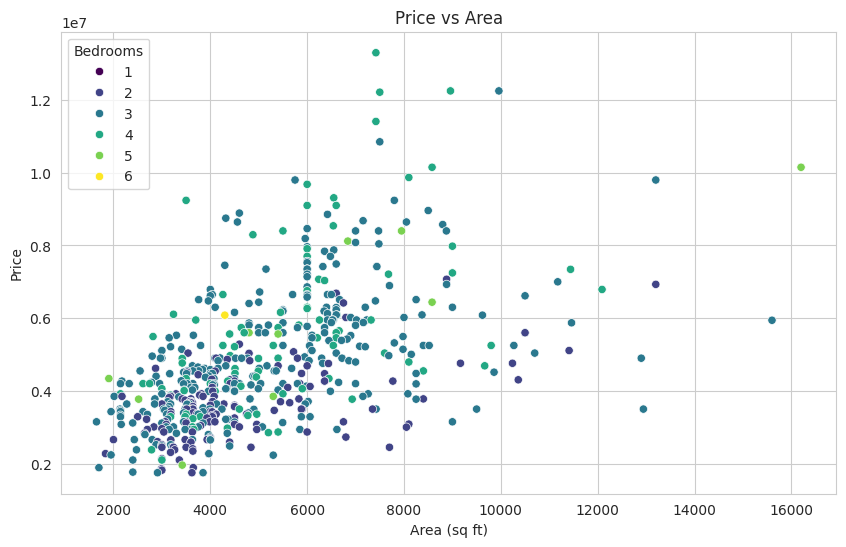

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='viridis')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

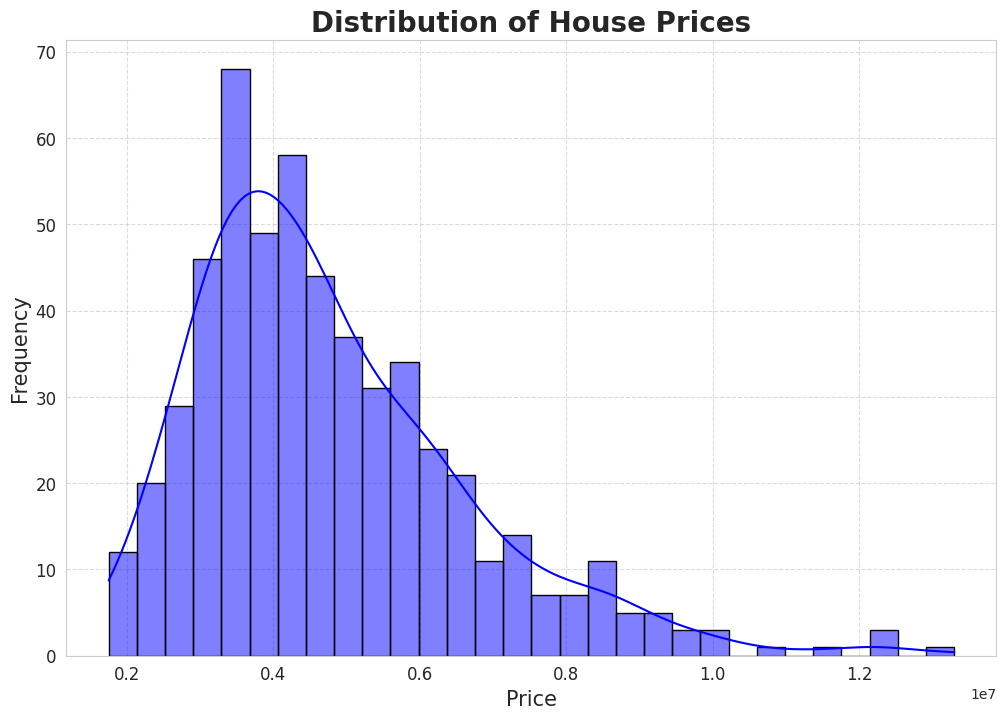

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks (fontsize=12)
plt.yticks (fontsize=12)
#Adding a grid
plt.grid (True, linestyle='--', alpha=0.7)
# Display the plot
plt.show()

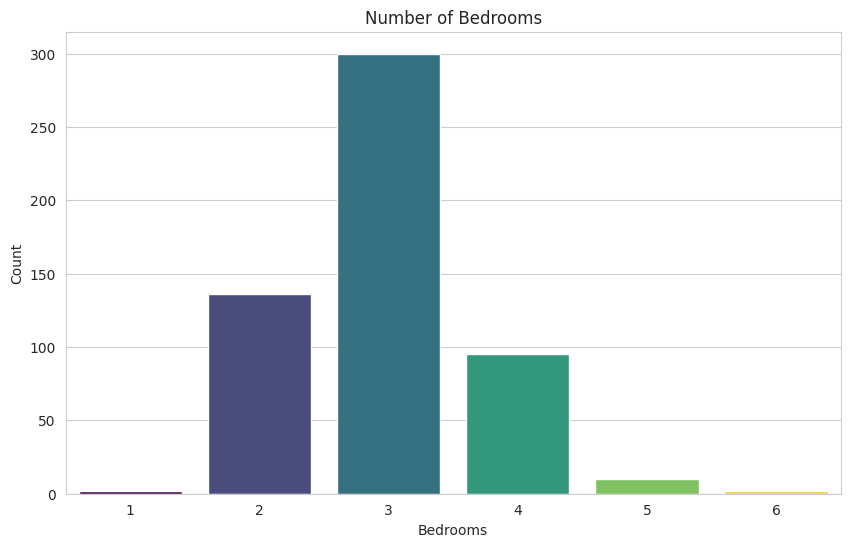

In [ ]:
#Count Plot of Bedrooms
plt.figure (figsize=(10, 6))
sns.countplot(x='bedrooms', data=df, palette='viridis',hue="bedrooms", legend=False)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()


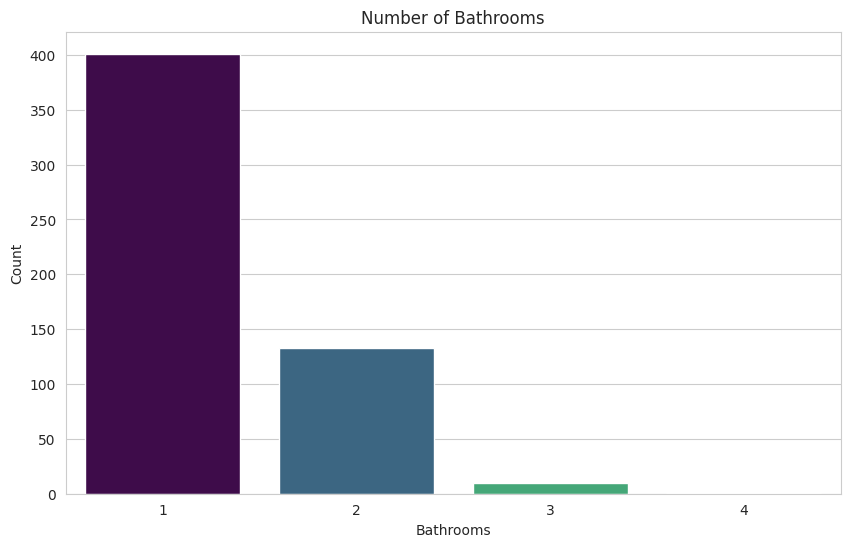

In [ ]:
#Count Plot of Bathrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=df, palette='viridis',hue="bathrooms", legend=False)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

In [ ]:
#Selecting relevant columns
df = df[['price', 'area', 'bedrooms', 'bathrooms']]

In [ ]:
#Creating Independent and Dependent Variables
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

In [ ]:
X.shape

(545, 3)

In [ ]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initializing the linear regression model
model = LinearRegression()

In [ ]:
#Training the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Making predictions
y_pred = model.predict(X_test)
y_pred

array([6383168.05981192, 6230250.35140428, 3597885.28090091,
       4289730.8386382 , 3930445.60575177, 4883933.33918115,
       5505773.16533075, 6068793.48103629, 3321512.02483442,
       3495157.72744705, 8731338.12527607, 3561265.8244721 ,
       3487335.97847431, 3633344.35548029, 3933900.2714526 ,
       6661080.95290716, 2893133.47793136, 4635197.40872131,
       4583377.42320885, 4274999.75826381, 4296640.17003986,
       4920207.32903988, 3462807.85199841, 3875170.95453847,
       5412497.19140831, 7425564.68389184, 3269692.03932195,
       5021117.35611339, 7122556.71331971, 3238600.04801447,
       5366583.9261965 , 3640253.68688195, 6057517.06636272,
       4847659.34932243, 4572198.51082701, 5573863.86824637,
       4167435.67282878, 4021179.33154444, 3764621.65211187,
       5307730.62714319, 5319221.21748587, 3456243.98716683,
       6202613.02579763, 4013357.58257171, 4534099.68582614,
       4235271.10270425, 6057517.06636272, 4525560.52386579,
       4983206.22693419,

In [ ]:
#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 2750040479309.0522
R-Squared: 0.4559299118872445


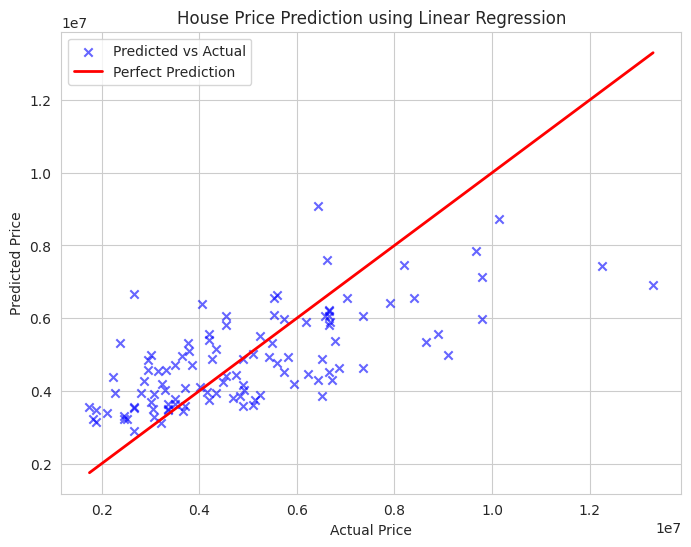

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, marker='x', label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("House Price Prediction using Linear Regression")
plt.legend()
plt.show()

LOAN PREDICTION

In [ ]:
df = pd.read_csv("/content/loan_prediction.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Univariate Analysis for Numerical Variables

Text(0, 0.5, 'Count')

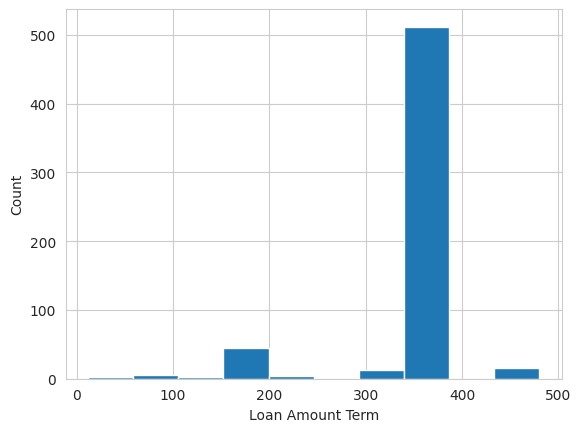

In [ ]:
# Histogram => Loan Amount Term
plt.hist (df["Loan_Amount_Term"])
plt.xlabel("Loan Amount Term")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

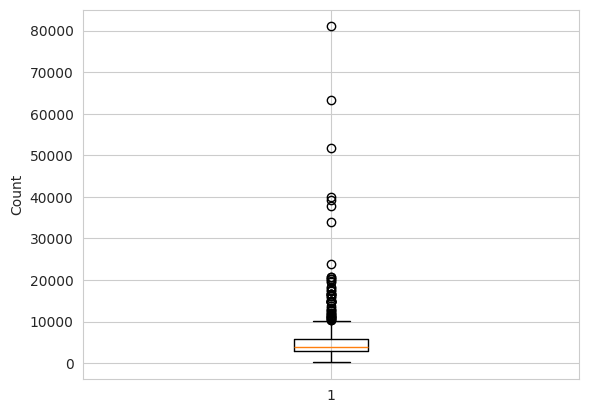

In [ ]:
# Boxplot => Applicant Income
plt.boxplot(df["ApplicantIncome"])
plt.ylabel("Count")


Text(0, 0.5, 'Count')

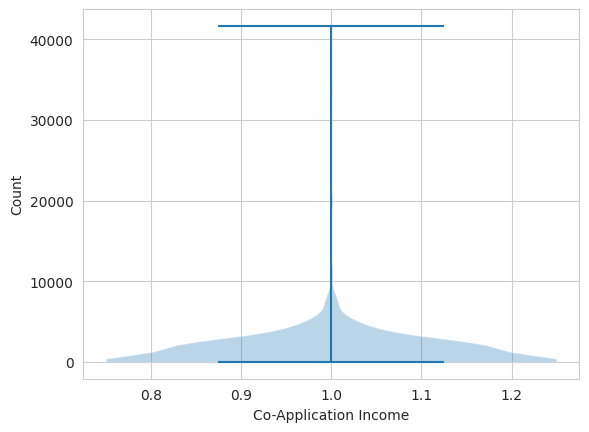

In [ ]:
# Violinplot => Co Applicant Income
plt.violinplot(df["CoapplicantIncome"])
plt.xlabel("Co-Application Income")
plt.ylabel("Count")


Univariate Analysis for Categorical Variables

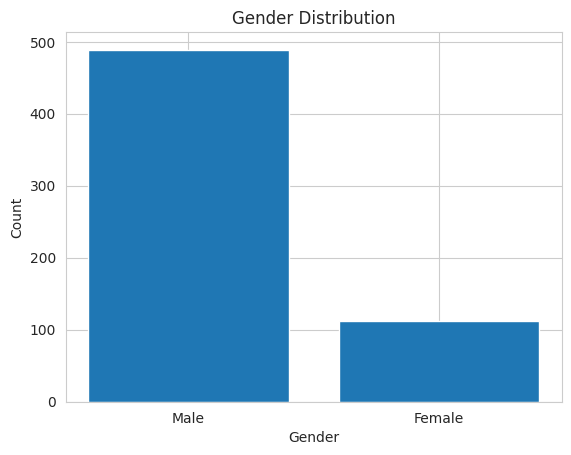

In [ ]:
# Bar graph => Gender
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Dependents Distribution')

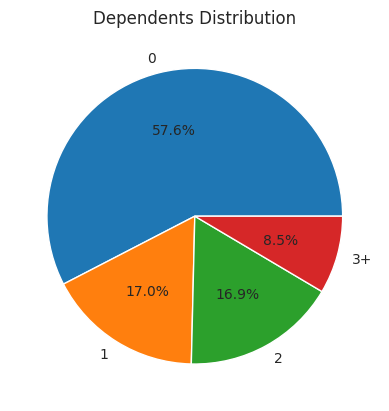

In [ ]:
# Pie chart => Dependents
dependents = df['Dependents'].value_counts()
plt.pie(dependents.values, labels=dependents.index, autopct='%1.1f%%')
plt.title ("Dependents Distribution")

Bivariate Analysis for Numerical Variables


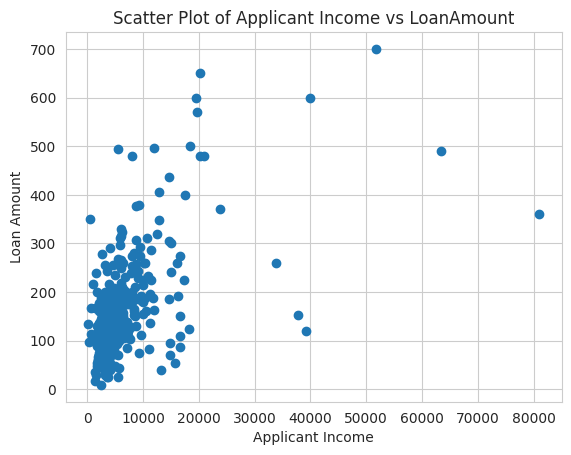

In [ ]:
# Scatterplot => Applicant Income & Loan Amount
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.title("Scatter Plot of Applicant Income vs LoanAmount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

Text(0.5, 0.98, 'Joint plot of Loan Amount & Applicant Income')

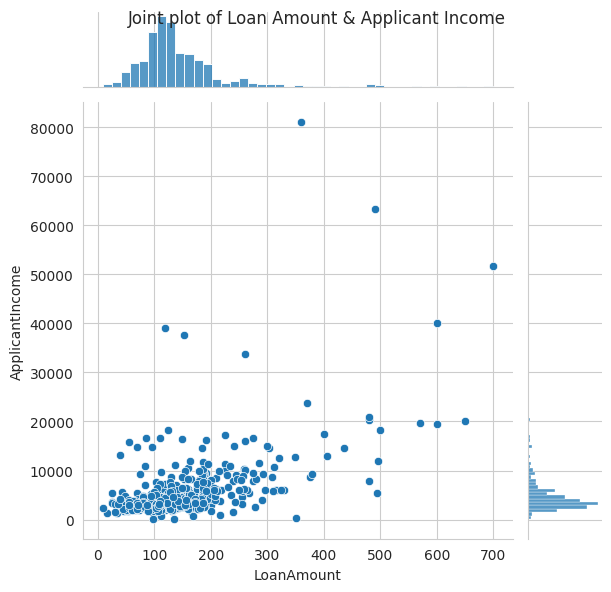

In [ ]:
# Jointplot => ApplicantIncome & Loan Amount
sns.jointplot(df, x="LoanAmount", y="ApplicantIncome", kind="scatter")
plt.suptitle("Joint plot of Loan Amount & Applicant Income")

Bivariate Analysis for Categorical Variables

<Axes: xlabel='Education', ylabel='count'>

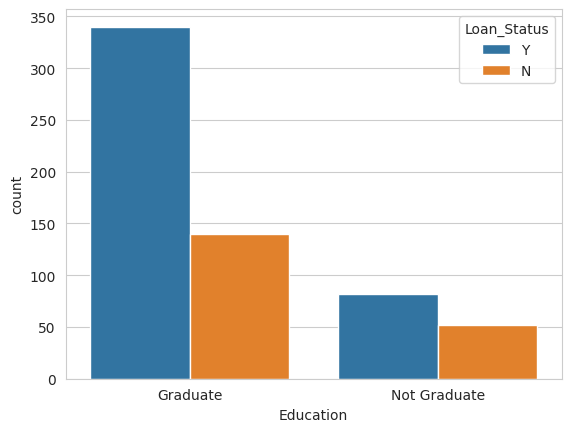

In [ ]:
# Countplot => Education & Loan Status
sns.countplot(df, x="Education", hue="Loan_Status")

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

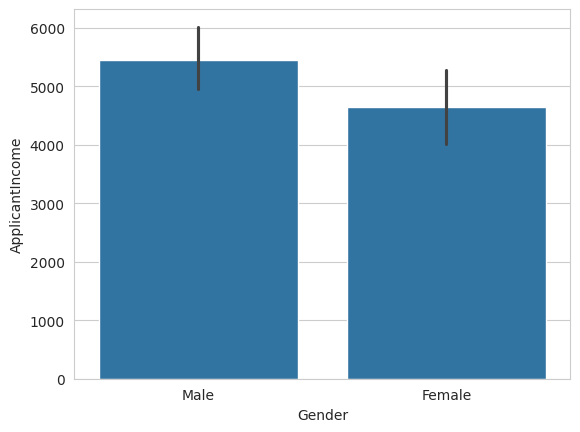

In [ ]:
# Barplot => Gender & Application Income
sns.barplot(df, x="Gender", y="ApplicantIncome")

<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

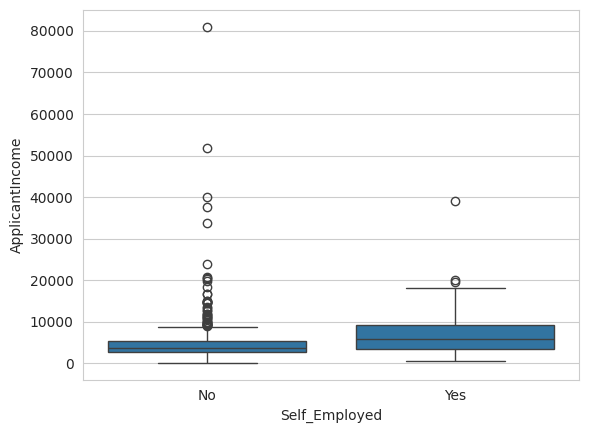

In [ ]:
# Boxplot => Self Employed & Application Income
sns.boxplot(df, x="Self_Employed", y="ApplicantIncome")

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

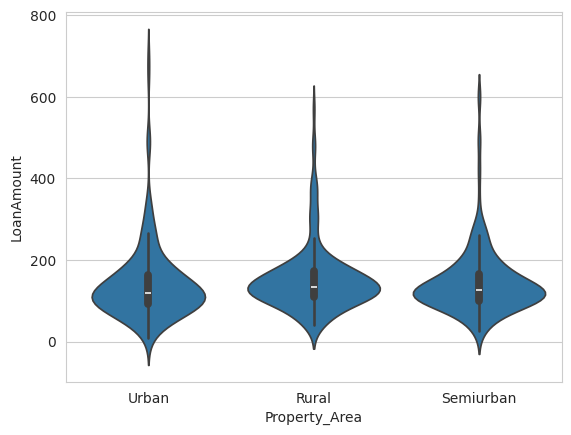

In [ ]:
# Violinplot => Property Area & Loan Amount
sns.violinplot(df, x="Property_Area", y="LoanAmount")

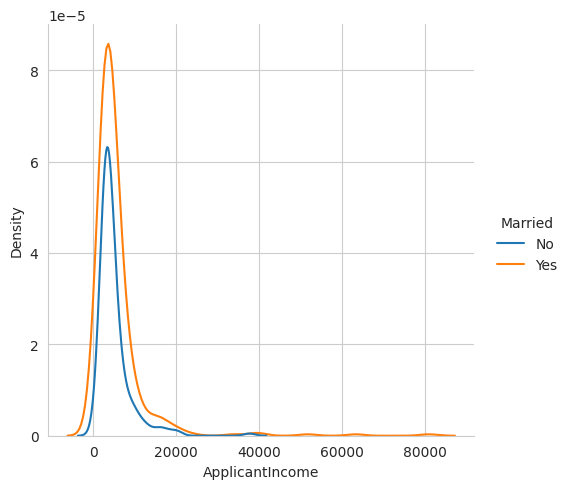

In [ ]:
# Displot => Applicant Income & Married
sns.displot(df, x= "ApplicantIncome", hue="Married", kind="kde")

Multivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap for all Numerical Variables')

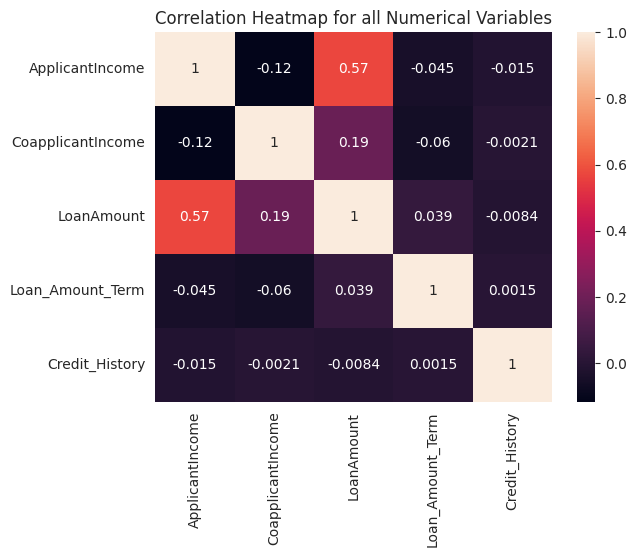

In [ ]:
num_df = df.select_dtypes(include=['number'])
sns.heatmap(num_df.corr(), annot=True)
plt.title("Correlation Heatmap for all Numerical Variables")

Decision Tree

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

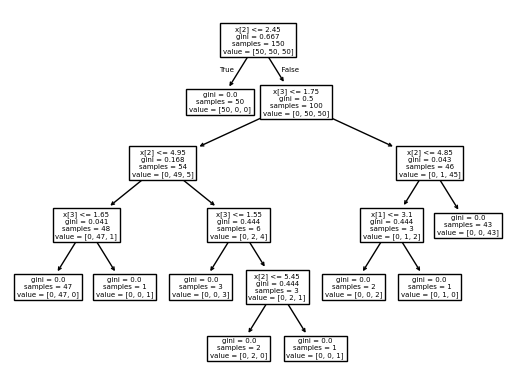

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [ ]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
df = pandas.read_csv("/content/table.csv")

In [ ]:
# Map categorical values
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

In [ ]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

In [ ]:
X = df[features]
y = df['Go']

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

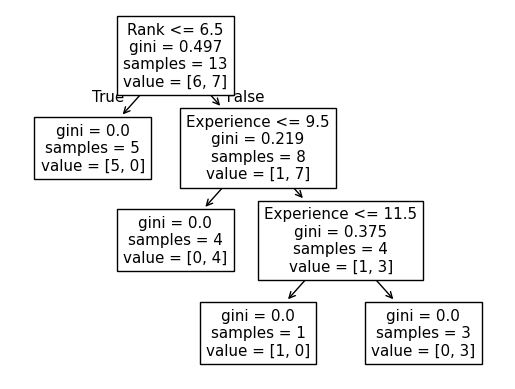

In [ ]:
tree.plot_tree(dtree, feature_names=features)
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import numpy as np

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.965


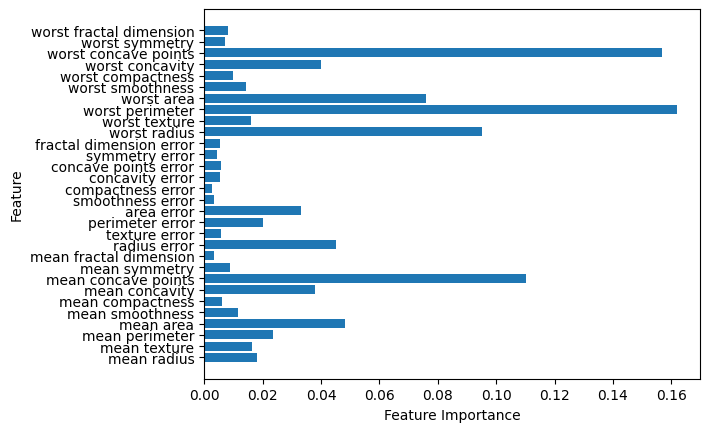

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=50, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.974


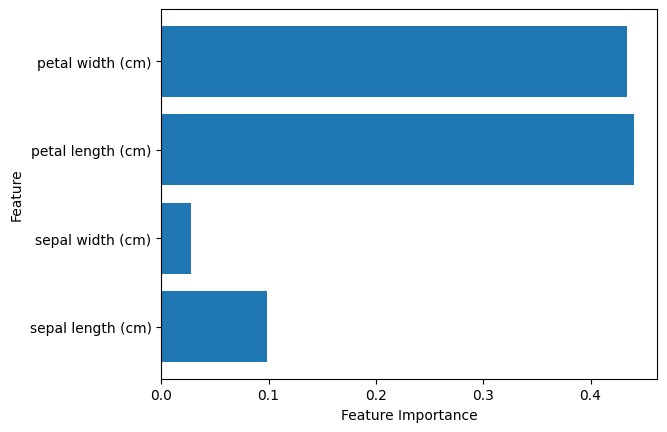

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np

# Load: IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.25
)

# Build and fit the Random Forest model
forest = RandomForestClassifier(n_estimators=50, random_state=0)
forest.fit(X_train, y_train)

# Accuracy on train and test sets
print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

# Plot feature importances
n_features = X.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), iris.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()